# Data Processing Of Phase Screens
Authors: Clovis Faure and Gauri Padalkar

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

In [20]:
def pli(image):
    '''Function to plot an image in the conventional format'''
    #plt.close()
    return plt.imshow(image.T,origin="lower")


### Simulating a Phase Screen

In [21]:

N=200
x = np.arange(N)-N//2
k2 = np.fft.fftshift(x[None,:]**2 + x[:,None]**2) + 1.0
#pli(np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real) # Phase

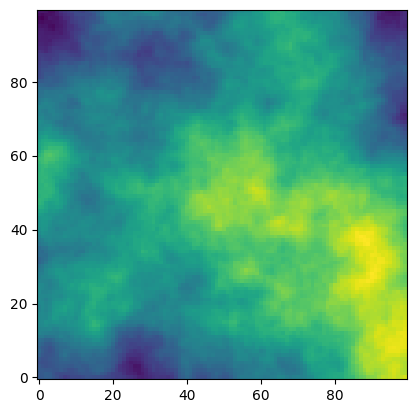

In [30]:
'''Taking a 100x100 crop of the 200x200 phase screen to get an unwrapped phase screen as we expect such an output from the optical bench'''
phase_img = np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real 
n = 100
phase = phase_img[0:n, 0:n] #- phase_img[1:n+1, 0:n] # Cropping to 100x100
pli(phase)

1.9366026259346265


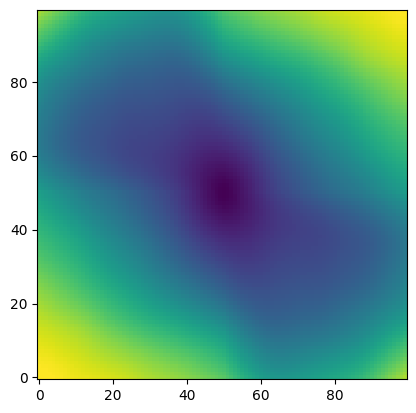

In [31]:
b = np.zeros((2*n,2*n))
b[0:n,0:n] = phase
auto = (np.fft.ifft2(np.abs(np.fft.fft2(b))**2)).real
auto = np.fft.fftshift(auto)
auto = auto[n//2:n//2+n, n//2:n//2+n]


support = np.zeros((2*n,2*n))
support[0:n,0:n] = 1
normalization = (np.fft.ifft2(np.abs(np.fft.fft2(support))**2)).real
normalization = np.fft.fftshift(normalization)
normalization = normalization[n//2:n//2+n, n//2:n//2+n]

auto_normalized = auto / normalization


Dphi = 2*(auto_normalized[n//2,n//2] - auto_normalized)

print(auto_normalized[n//2,n//2])
print
#Dphi = auto_normalized
pli(Dphi)


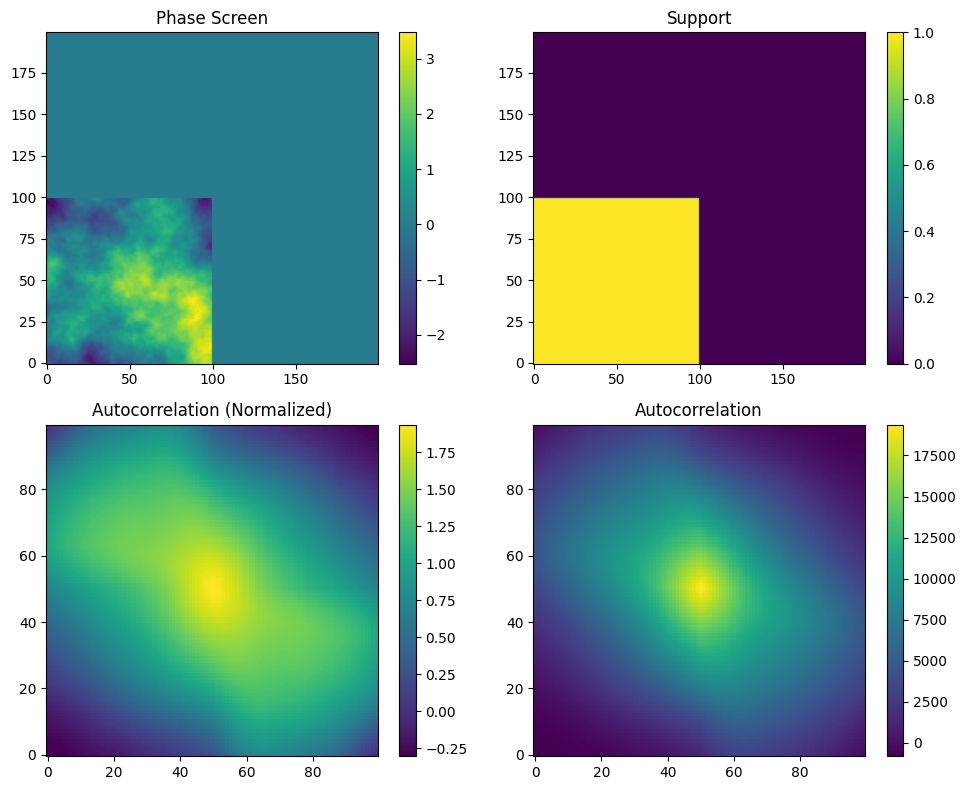

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


plt.subplot(2, 2, 1)
im1 = pli(b)
plt.title("Phase Screen")
plt.colorbar(im1)


plt.subplot(2, 2, 2)
im2 = pli(support)
plt.title("Support")
plt.colorbar(im2)


plt.subplot(2, 2, 3)
im3 = pli(auto_normalized)
plt.title("Autocorrelation (Normalized)")
plt.colorbar(im3)

plt.subplot(2, 2, 4)
im4 = pli(auto)
plt.title("Autocorrelation")
plt.colorbar(im4)

plt.tight_layout()
#plt.show()


In [33]:
tmp = np.arange(n) - n//2
X, Y = np.meshgrid(tmp, tmp, indexing='ij')
r = np.sqrt(X**2 + Y**2)
u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))

#plt.scatter(r.flatten(), Dphi.flatten(), s=1)
#plt.loglog()

/var/folders/bs/jpbbg6617vb24gzxpfnn6db80000gn/T/ipykernel_95774/1012637059.py:4: RuntimeWarning: divide by zero encountered in divide
  u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))
/var/folders/bs/jpbbg6617vb24gzxpfnn6db80000gn/T/ipykernel_95774/1012637059.py:4: RuntimeWarning: invalid value encountered in divide
  u = 5/r**(1/3)/3-5*X**2/(9*r**(7/3))


(50, 50) (50, 50)
0.00625631717694559


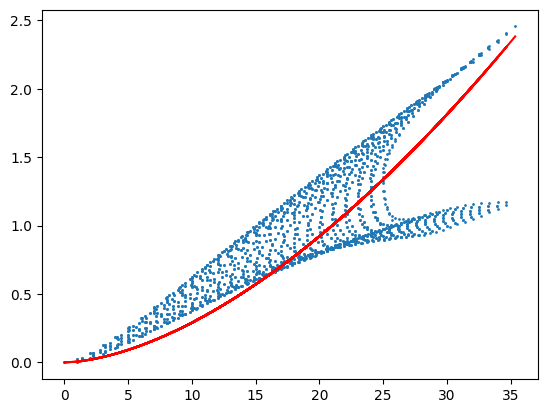

In [34]:
Dphi_crop = Dphi[(n//4):(3*n//4), (n//4):(3*n//4)]
#Dphi_crop = Dphi[(n//4):(3*n//4), (n//4):(3*n//4)]
r_crop = r[(n//4):(3*n//4), (n//4):(3*n//4)]
print(Dphi_crop.shape, r_crop.shape)
plt.scatter(r_crop, Dphi_crop, s=1)


k = np.sum(Dphi_crop * r_crop**(5/3)) / np.sum(r_crop**(2*(5/3)))
Dphi_fit = k * r_crop**(5/3)
plt.plot(r_crop, Dphi_fit, color='red')
print(k)
